# 📊 Biomedical Data Analysis with Pandas

In this module, you will learn about one of the most popular and useful Python libraries for data analysis and manipulation: ***pandas***!

<img src='graphics/pandas_logo.png' alt='The Pandas logo' align='center' width=200>

### 📚 After this module, students will be able to:
* Explain the various components of a *pandas* dataframe.
* Use read_csv() to create new dataframes from real-world patient data.
* Slice and dice data with *pandas* index and dataframe management functions.
* Illustrate the appropriate use of basic statistical functions to summarize a clinical dataset.
* Use matplotlib functions to generate clear graphs and plots.

🩺 While pandas is widely used across many domains, in this lesson we'll be exploring *pandas* in the context of **healthcare data**.

# 🚀 Let's get started!

Like we learned last module, before we can use pandas, we must **import** the pandas library.
* For illustration purposes, we'll also import the scientific computing library NumPy.
* Both NumPy and pandas are usually imported with abbreviated aliases, `np` and `pd`.

In [1]:
import numpy as np
import pandas as pd

## 🗂️ Pandas Dataframes

📌 *pandas* provides one of the most useful data structures for managing data: the dataframe.

**Dataframes..**
* allow fast, flexible, and efficient data manipulation.
* are the natural data structure for **tabular** data.
* are two-dimensional, containing both **rows** and **columns**.
* consist of one or more **Series** (column)


📌 ***pandas*** is built on top of the **NumPy** library, which in practice means that most of the methods defined for NumPy Arrays apply to *pandas* Series/DataFrames.

🔍 **What makes Pandas so attractive?**
1. Powerful and efficient interface to access and manipulate individual records.
2. Proper handling of missing values.
3. Relational database-style operations between DataFrames.

## 🏛️ Creating a Series

We'l kick things off by creating our first *pandas* Series! (Remember: in the context of a **DataFrame** (table), each column is represented by a **Series**).

💻 First, let's create some sample data to illustrate the creation of our Series.

In [2]:
spo2 = [88, 99, 88, 85, 100, 98] # Review: this is a Python list, containing 6 values.
risk = ['high', 'low', 'high', 'high', 'low', 'low']

In [3]:
# Create our first series
spo2_series = pd.Series(spo2)
spo2_series # If a variable name is the last line in a code cell, Jupyter will display the contents of the variable.

0     88
1     99
2     88
3     85
4    100
5     98
dtype: int64

In [4]:
# Do the same for risk
pd.Series(risk) # Display the 'risk' series

0    high
1     low
2    high
3    high
4     low
5     low
dtype: object

## 🗂️ Creating a Pandas Dataframe

* Now that we've seen a Series, we can look at how these are combined as **columns** in a **table**.
* By popular convention, we will name our DataFrame variable `df`.

**🔍 Example:** Create a small DataFrame from our sample data.

In [5]:
df = pd.DataFrame({'spo2': spo2, 'risk': risk}) # Create the DataFrame
df # View the DataFrame

,spo2,risk
0,88,high
1,99,low
2,88,high
3,85,high
4,100,low
5,98,low


**🔍 Example:** Create a larger DataFrame from random data.

In [6]:
# Make some random numbers for data. 
# This makes an array of random integers from 1-10, then reshapes it into a 500x4 matrix (500 rows and 4 columns)
random_data = np.random.randint(1,10, size=2000).reshape(500, 4)

# Create some example column names
column_names = ['columnA', 'columnB', 'columnC', 'columnD']

# Create the DataFrame from the random data we generated.
# Since the input matrix has 500 rows and 4 columns, the DataFrame will have 500 rows and 4 columns
df = pd.DataFrame(data=random_data, columns=column_names)
df # View the dataframe

,columnA,columnB,columnC,columnD
0,3,5,4,1
1,5,1,6,1
2,3,8,7,2
3,4,9,5,3
4,6,6,8,7
...,...,...,...,...
495,1,4,1,2
496,7,7,6,7
497,5,6,3,6
498,1,7,8,6


📌 When viewing a large DataFrame in a Jupyter notebook, sometimes the data will be **truncated** as above.

# 💾  Creating a DataFrame from an existing data file

* Instead of creating a DataFrame from scratch (tedious!), usually we create a DataFrame by loading an existing data file.
* The most common file format for storing datasets is the **comma-separated value** `(.csv)` file.

📌 To create a pandas DataFrame from a `.csv` file, we'll use the `read_csv` function.

### 🏥 Let's load some real-world patient data from an electronic health record (EHR) system!
The main input argument to `read_csv` function can be a local filename, or a remote URL of a file stored on the web. In this example, we'll be using an online file.

In [31]:
url='https://www.dropbox.com/s/oqesbec531xq5lp/temperature.csv?dl=1' # Specify the file URL
df = pd.read_csv(url) # Create the DataFrame from the given URL
df # View the DataFrame we just created

,patient,time,temp_source,temp_value,temp_unit
0,1,2017-06-23 13:53:00,Oral,97.7,Farenheit
1,2,2012-09-19 23:50:00,NaN,96.0,Farenheit
2,2,2018-07-17 05:19:00,NaN,96.7,Farenheit
3,2,2022-09-24 14:44:00,NaN,96.6,Farenheit
4,3,2012-06-12 23:02:00,NaN,97.0,Farenheit
...,...,...,...,...,...
1995,998,2015-09-27 17:51:00,Oral,98.6,Farenheit
1996,998,2016-02-27 06:19:00,NaN,96.9,Farenheit
1997,998,2017-11-23 07:33:00,Oral,98.2,Farenheit
1998,999,2017-10-16 16:34:00,NaN,96.5,Farenheit


✅ We can see that this dataset contains 2000 rows and 5 columns corresponding to patient temperature measurements from an EHR system.  
✅ Below is a more detailed description of each column:

| Column |  Description |
| --- | --- |
|  patient |   unique patient identifier |
|  time |   the date and time of temperature measurement |
|  temp_source |   the temperature acquisition method |
|  temp_value |   the measured temperature value |
|  temp_unit |   the temperature measurement unit |

## 🕵️‍♂️ Viewing Parts of a Dataframe
* DataFrames often hold a large number of rows (in many AI projects, you might be dealing with hundreds of thousands, or even millions, of samples!)
* Sometimes we just want to get a preview, or a sense of what data is being stored in our DataFrame.
* In the below examples, we'll see a few ways to view parts of a DataFrame
    * This includes viewing a subset of columns, or a subset of rows, or both.

📋 Let's start by viewing only some of a DataFrame's **rows**. Since pandas is so flexible, there are several ways to accomplish this. In the examples below, we will use the pandas functions `head` and `tail`.

**✏️ Exercise:** Use `head` to view the first 5 rows of our `df` DataFrame. (**Hint:** Given a dataframe `X`, calling `X.head()` will show the first `5` rows of the DataFrame.  

In [8]:
# Call df.head()
df.head()

,patient,time,temp_source,temp_value,temp_unit
0,1,2017-06-23 13:53:00,Oral,97.7,Farenheit
1,2,2012-09-19 23:50:00,NaN,96.0,Farenheit
2,2,2018-07-17 05:19:00,NaN,96.7,Farenheit
3,2,2022-09-24 14:44:00,NaN,96.6,Farenheit
4,3,2012-06-12 23:02:00,NaN,97.0,Farenheit


**✏️ Exercise:** Use `head` to view the first **10** rows of `df`. (**Hint:** You can also provide an input argument `n` to the `head` function to show the first `n` rows (instead of the default `5` rows).

In [9]:
# Call df.head(10)
df.head(10)

,patient,time,temp_source,temp_value,temp_unit
0,1,2017-06-23 13:53:00,Oral,97.7,Farenheit
1,2,2012-09-19 23:50:00,NaN,96.0,Farenheit
2,2,2018-07-17 05:19:00,NaN,96.7,Farenheit
3,2,2022-09-24 14:44:00,NaN,96.6,Farenheit
4,3,2012-06-12 23:02:00,NaN,97.0,Farenheit
5,3,2015-11-30 09:52:00,NaN,96.7,Farenheit
6,3,2016-05-12 17:27:00,NaN,97.7,Farenheit
7,3,2022-02-08 17:38:00,NaN,98.7,Farenheit
8,3,2022-08-02 21:30:00,NaN,98.0,Farenheit
9,4,2013-09-20 01:34:00,NaN,97.6,Farenheit


**✏️ Exercise:** Use `tail` to view the **last** 5 rows of our `df` DataFrame. (**Hint:** Given a dataframe `X`, calling `X.tail()` will show the **last** `5` rows of the DataFrame.  

In [10]:
# Call df.tail()
df.tail()

,patient,time,temp_source,temp_value,temp_unit
1995,998,2015-09-27 17:51:00,Oral,98.6,Farenheit
1996,998,2016-02-27 06:19:00,NaN,96.9,Farenheit
1997,998,2017-11-23 07:33:00,Oral,98.2,Farenheit
1998,999,2017-10-16 16:34:00,NaN,96.5,Farenheit
1999,999,2022-02-07 20:48:00,Oral,97.5,Farenheit


**✏️ Exercise:** Use `tail` to view the **last** `10` rows of `df`. (**Hint:** You can also provide an input argument `n` to the `tail` function to show the last `n` rows (instead of the default `5` rows).

In [11]:
# Call df.tail(10)
df.tail(10)

,patient,time,temp_source,temp_value,temp_unit
1990,996,2013-03-18 22:29:00,NaN,95.2,Farenheit
1991,996,2016-03-21 00:57:00,NaN,96.6,Farenheit
1992,996,2020-12-03 17:30:00,NaN,95.9,Farenheit
1993,997,2014-06-17 12:25:00,NaN,99.2,Farenheit
1994,997,2020-12-13 22:27:00,Oral,99.3,Farenheit
1995,998,2015-09-27 17:51:00,Oral,98.6,Farenheit
1996,998,2016-02-27 06:19:00,NaN,96.9,Farenheit
1997,998,2017-11-23 07:33:00,Oral,98.2,Farenheit
1998,999,2017-10-16 16:34:00,NaN,96.5,Farenheit
1999,999,2022-02-07 20:48:00,Oral,97.5,Farenheit


📋 Now, let's see some ways to view a subset of a DataFrame's **columns**.  
**Reminder:** If the last line inside a code cell is simply a variable name, Jupyter will display the value of that variable.

For a given DataFrame `df` and desired column `col`, one way to view a single column is to call `df['col']`. (**Important:** the column name `col` must be in quotes!).  
**✏️ Exercise:** Use the above method to view the `temp_value` column of our `df` DataFrame.

In [12]:
# Call df['temp_value']
df['temp_value']

0       97.7
1       96.0
2       96.7
3       96.6
4       97.0
        ... 
1995    98.6
1996    96.9
1997    98.2
1998    96.5
1999    97.5
Name: temp_value, Length: 2000, dtype: float64

We can also adapt this method to view multiple columns. Instead of passing in a single string column name `'C'`, instead we will pass in a **list** of string column names, e.g. `['A', 'B', 'C']`. For example: `df[['A', 'B', 'C']]` (**Important:** Notice the double brackets!)

**✏️ Exercise:** Use the above method to view the `temp_value` **and** `temp_unit` columns of our `df` DataFrame.

In [13]:
# Call df[['temp_value', 'temp_unit']]
df[['temp_value', 'temp_unit']]

,temp_value,temp_unit
0,97.7,Farenheit
1,96.0,Farenheit
2,96.7,Farenheit
3,96.6,Farenheit
4,97.0,Farenheit
...,...,...
1995,98.6,Farenheit
1996,96.9,Farenheit
1997,98.2,Farenheit
1998,96.5,Farenheit


🔍 These methods can also be combined!

In [14]:
df[['time', 'temp_value']].head(2)

,time,temp_value
0,2017-06-23 13:53:00,97.7
1,2012-09-19 23:50:00,96.0


## 🌱 Creating new columns 

* We can easily create new columns in an existing DataFrame.
* When we define an equation as below, equation will be applied to every **row** of the DataFrame.
* In this way, we can create new columns from different combinations of existing columns.

Let's use an equation to convert Fahrenheit temperature to Celsius, and assign these values to a new column called `temp_celsius`.

In [15]:
df['temp_celsius'] = (df['temp_value'] - 32) * (5/9)
df.head()

,patient,time,temp_source,temp_value,temp_unit,temp_celsius
0,1,2017-06-23 13:53:00,Oral,97.7,Farenheit,36.500000
1,2,2012-09-19 23:50:00,NaN,96.0,Farenheit,35.555556
2,2,2018-07-17 05:19:00,NaN,96.7,Farenheit,35.944444
3,2,2022-09-24 14:44:00,NaN,96.6,Farenheit,35.888889
4,3,2012-06-12 23:02:00,NaN,97.0,Farenheit,36.111111


## 🗑️ Deleting columns 

* We can also **drop** (delete) columns.

Let's remove the `temp_celsius` column that we previously created.

In [16]:
df.drop(columns=['temp_celsius']) # Will this remove the column?
df.head()

,patient,time,temp_source,temp_value,temp_unit,temp_celsius
0,1,2017-06-23 13:53:00,Oral,97.7,Farenheit,36.500000
1,2,2012-09-19 23:50:00,NaN,96.0,Farenheit,35.555556
2,2,2018-07-17 05:19:00,NaN,96.7,Farenheit,35.944444
3,2,2022-09-24 14:44:00,NaN,96.6,Farenheit,35.888889
4,3,2012-06-12 23:02:00,NaN,97.0,Farenheit,36.111111


**What happened? `temp_celsius` is still there!**

<div style="padding: 10px;margin-bottom: 20px;border: thin solid #E5C250;border-left-width: 10px;background-color: #fff">
    <p><strong>Tip:</strong> Unless you specify <code>inplace=True</code> or assign the dataframe back to itself (or a different variable name) <strong>the <code>drop</code> method does not change the original DataFrame!</strong></p>
   </div>
   
Below is one way to permanently remove a column from a DataFrame by assigning the result to a new DataFrame variable `df2`.

In [17]:
# Now, after dropping the column, we are assigning the resulting DataFrame to a new variable.
# This will persist the change.
df2 = df.drop(columns=['temp_celsius']) 
df2.head()

,patient,time,temp_source,temp_value,temp_unit
0,1,2017-06-23 13:53:00,Oral,97.7,Farenheit
1,2,2012-09-19 23:50:00,NaN,96.0,Farenheit
2,2,2018-07-17 05:19:00,NaN,96.7,Farenheit
3,2,2022-09-24 14:44:00,NaN,96.6,Farenheit
4,3,2012-06-12 23:02:00,NaN,97.0,Farenheit


**✏️ Exercise:** Create a new DataFrame called `df3`, that contains everything in the `df` DataFrame **except** the `temp_source` column.

In [18]:
# Code it!
df3 = df.drop(columns=['temp_source'])
df3.head()

,patient,time,temp_value,temp_unit,temp_celsius
0,1,2017-06-23 13:53:00,97.7,Farenheit,36.500000
1,2,2012-09-19 23:50:00,96.0,Farenheit,35.555556
2,2,2018-07-17 05:19:00,96.7,Farenheit,35.944444
3,2,2022-09-24 14:44:00,96.6,Farenheit,35.888889
4,3,2012-06-12 23:02:00,97.0,Farenheit,36.111111


## 📊 Descriptive Statistics
⚠️ Before diving into an AI project, it is critical to become familiar with the data you will be modeling!  Pandas has an large collection of optimized methods designed to analyze your data.

A preliminary data discovery and exploration phase can help you better understand the data you will be modeling, and has many downstream advantages:
* You may identify potential problems with the dataset (e.g., missing values, outliers, incomplete columns, irrelevant information)
* Results of data exploration may help you decide which preproessing or modeling approach to take.
* A better understanding of your population will help you interpret your future results.

#### 🤔 Remember Python functions?
Pandas offers many **functions** that take as **input** a set of values (example: all of the values from the `temp_celsius` column), and **return** a calculated **output** value based on which function was used.

💡 Here are a few examples (most are self-explanatory!):
* `sum` (sum the input values)
* `count` (count the number of input values), `value_counts` (count the number of each unique value)
* `min` (return the minimum value), `max` (return the maximum value)
* `mean` (return the mean value), `median` (median), `mode` (mode)
* `var` (variance), `std` (standard deviation)
* `quantile` (compute quantiles)

Let's take a look at a few examples using our clinical dataset!

🏫 **Example:** Here's how we can compute the **mean** patient temperature, measured in Fahrenheit (i.e., the `temp_value` of our `df` DataFrame):

In [19]:
# Compute the mean temperature (Fahrenheit)
df['temp_value'].mean()

97.44479999999999

It's that easy! Let's compute a few more descriptive statistics:

**✏️ Exercise:** Compute the **minimum** Fahrenheit temperature (`temp_value`).

In [20]:
# Compute the minimum temperature (Fahrenheit)
df['temp_value'].min()

89.5

**✏️ Exercise:** Compute the **maximum** Fahrenheit temperature (`temp_value`).

In [21]:
# Compute the maximum temperature (Fahrenheit)
df['temp_value'].max()

103.3

**✏️ Exercise:** Count the number of occurrences of **each unique** temperature acquisition method (excluding missing values).  
* **Hint 1:** The `temp_source` column contains the temperature acquisition method.
* **Hint 2:** The `value_counts` function can be used to calculate counts of each unique value (excluding missing values)

In [22]:
# Code it!
df['temp_source'].value_counts()

Oral                 265
Core                  39
Temporal              36
Tympanic              27
PA catheter probe     11
Axillary               8
7                      4
Skin                   1
Bladder probe          1
Name: temp_source, dtype: int64

Finally, the `describe` function can be used on an entire DataFrame to display several common statistics, computed for each column, all at once. (**Note:** Be aware of the values and data types contained in each column, as sometimes the statistics will not make sense. For example, `patient` is a randomized patient identifier, so calculations with these values will be meaningless.)

In [23]:
# (Almost) everything, (almost) everywhere, all at once
# Note: will only compute statistics for columns with numerical data.
df.describe()

,patient,temp_value,temp_celsius
count,2000.000000,2000.000000,2000.000000
mean,499.017000,97.444800,36.358222
std,289.878512,1.376775,0.764875
min,1.000000,89.500000,31.944444
25%,250.000000,96.600000,35.888889
50%,510.500000,97.400000,36.333333
75%,747.250000,98.300000,36.833333
max,999.000000,103.300000,39.611111


## 🔬 Filtering data
Pandas makes it easy to select, analyze, and process subsets of your data based on some criteria `C`. This is accomplished with easily understandable syntax: `df[C]` will return a subset of DataFrame `df` that **matches** the criteria `C` listed inside brackets `[]`.

### Comparing values
In pandas, we can create filtering criteria using familiar mathematical operators to compare values:
* `>`: greater than
* `<`: less than
* `>=`: greater than or equal to
* `<=`: less than or equal to
* `!=`: is not equal to
* `==`: is equal to a single value
* **Bonus:** `.isin(L)`: is equal to any value contained in the list `L`.

**🏫 Example:** Display readings where temperature is **greater** than 102$^{\circ} F$.
* In this example, the criteria `C` is `df['temp_value'] > 102`.
* Recall the Pandas filtering syntax: `df[C]`.
* So, this is what we want: `df[df['temp_value'] > 102]`.

In [24]:
# Select rows where Fahrenheit temperature is greater than 102 degrees.
df[df['temp_value'] > 102]

,patient,time,temp_source,temp_value,temp_unit,temp_celsius
388,183,2021-10-26 00:23:00,NaN,103.3,Farenheit,39.611111
401,196,2020-02-15 10:49:00,NaN,103.1,Farenheit,39.500000
436,213,2016-11-21 04:23:00,NaN,102.2,Farenheit,39.000000
903,468,2021-06-23 21:13:00,NaN,102.6,Farenheit,39.222222
960,492,2015-02-10 11:28:00,NaN,102.7,Farenheit,39.277778


**✏️ Exercise:** Display readings where temperature is less than 94$^{\circ} F$.

In [25]:
# Display rows where measured Fahrenheit temperature is less than 94 degrees.
df[df['temp_value'] < 94]

,patient,time,temp_source,temp_value,temp_unit,temp_celsius
17,8,2022-05-18 22:23:00,NaN,93.9,Farenheit,34.388889
363,173,2020-02-09 17:47:00,NaN,93.3,Farenheit,34.055556
460,227,2015-06-23 11:39:00,NaN,93.8,Farenheit,34.333333
511,256,2013-05-09 13:05:00,NaN,92.3,Farenheit,33.500000
946,485,2015-01-02 22:10:00,NaN,93.6,Farenheit,34.222222
1049,536,2013-08-28 05:16:00,NaN,92.2,Farenheit,33.444444
1241,625,2015-04-04 22:11:00,NaN,93.9,Farenheit,34.388889
1315,659,2014-02-08 15:39:00,NaN,93.6,Farenheit,34.222222
1345,672,2020-03-06 08:20:00,NaN,89.5,Farenheit,31.944444
1470,735,2020-10-16 17:02:00,NaN,90.6,Farenheit,32.555556


**🏫 Example:** Display the first 5 readings where the temperature acquisition method (`temp_source`) is `Core`.

* Recall that the symbol `==` will check for equality (we want the source to be equal to the single value `Core`).
* In this example, the criteria `C` is `df['temp_value'] == 'Core'`.
* Given the Pandas filtering syntax: `df[C]`, this is what we want: `df[df['temp_source'] == 'Core']`.

In [26]:
# Show the first 5 core temperature measurements.
df[df['temp_source'] == 'Core'].head()

,patient,time,temp_source,temp_value,temp_unit,temp_celsius
49,22,2019-03-26 08:56:00,Core,98.4,Farenheit,36.888889
153,67,2013-07-02 01:22:00,Core,99.5,Farenheit,37.500000
189,83,2015-02-21 06:46:00,Core,98.6,Farenheit,37.000000
210,96,2022-07-16 22:41:00,Core,98.8,Farenheit,37.111111
375,180,2020-06-22 13:51:00,Core,99.5,Farenheit,37.500000


**🏫 Excercise:** Display the first 5 readings where the temperature acquisition method (`temp_source`) is `Tympanic`.

In [27]:
# Show the first 5 tympanic (ear) temperature measurements.
df[df['temp_source'] == 'Tympanic'].head()

,patient,time,temp_source,temp_value,temp_unit,temp_celsius
223,105,2014-08-02 12:17:00,Tympanic,99.5,Farenheit,37.500000
384,182,2022-10-30 02:52:00,Tympanic,98.8,Farenheit,37.111111
483,241,2017-08-21 11:50:00,Tympanic,99.7,Farenheit,37.611111
500,250,2020-04-26 07:41:00,Tympanic,97.3,Farenheit,36.277778
501,251,2016-06-12 20:53:00,Tympanic,100.0,Farenheit,37.777778


### Combining multiple criteria

Multiple criteria can be combined using either the `&` or `|` symbols:
* C1 `&` C2: This will select rows that match **both** criteria C1 **and** C2.
* C1 `&` C2: This will select rows that match **either** criteria C1 **or** C2.

**🏫 Example:** Display readings where temperature is between 99$^{\circ} F$ and 100$^{\circ} F$. In this example, we have two criteria:
* C1: `df['temp_value'] >= 99`
* C2: `df['temp_value'] <= 100`

In [35]:
# Select rows where the Fahrenheit temperature is between 99 and 100 degrees.
df[(df['temp_value'] >= 99) & (df['temp_value'] <= 100)]

,patient,time,temp_source,temp_value,temp_unit,temp_celsius
23,11,2013-05-03 04:45:00,Oral,99.3,Farenheit,37.388889
33,17,2018-10-27 00:20:00,Oral,99.0,Farenheit,37.222222
40,20,2014-02-13 17:57:00,NaN,99.0,Farenheit,37.222222
62,27,2014-09-23 23:04:00,NaN,99.3,Farenheit,37.388889
83,35,2022-03-05 01:43:00,Oral,99.5,Farenheit,37.500000
...,...,...,...,...,...,...
1955,975,2021-12-15 19:35:00,NaN,99.8,Farenheit,37.666667
1956,976,2014-07-23 12:27:00,Oral,99.5,Farenheit,37.500000
1985,992,2018-05-20 17:47:00,Core,99.9,Farenheit,37.722222
1993,997,2014-06-17 12:25:00,NaN,99.2,Farenheit,37.333333


**✏️ Excercise:** Display all `Core` temperatures that are greater than 100$^{\circ} F$. (**Hint:** we have 2 criteria.)

In [36]:
# Display all rows with core temperature greater than 100 degrees F.
df[(df['temp_source'] == 'Core') & (df['temp_value'] > 100)]

,patient,time,temp_source,temp_value,temp_unit,temp_celsius
493,248,2014-03-14 19:49:00,Core,100.4,Farenheit,38.000000
592,296,2012-05-09 07:48:00,Core,100.6,Farenheit,38.111111
1014,517,2022-12-29 02:44:00,Core,100.6,Farenheit,38.111111
1125,568,2022-05-23 16:05:00,Core,100.9,Farenheit,38.277778
1280,641,2014-05-22 07:35:00,Core,100.6,Farenheit,38.111111
1339,671,2020-07-07 15:39:00,Core,100.8,Farenheit,38.222222
1573,778,2013-05-20 15:26:00,Core,100.2,Farenheit,37.888889
1613,798,2014-09-18 09:10:00,Core,100.6,Farenheit,38.111111
1887,943,2021-11-21 05:23:00,Core,100.8,Farenheit,38.222222


### Analyzing filtered data
We can also perform our descriptive statistics on a filtered subset!

In [37]:
df[(df['temp_source'] == 'Core') & (df['temp_value'] > 100)].describe()

,patient,temp_value,temp_celsius
count,9.000000,9.000000,9.000000
mean,606.666667,100.611111,38.117284
std,228.880973,0.214735,0.119297
min,248.000000,100.200000,37.888889
25%,517.000000,100.600000,38.111111
50%,641.000000,100.600000,38.111111
75%,778.000000,100.800000,38.222222
max,943.000000,100.900000,38.277778


## Data visualization
* Let's conclude this lesson by learning how Pandas can enhance our understanding of a dataset with its many built-in visualization tools.

* In the next module, we'll be building a machine learning prediction model using a real-world patient dataset. We will use this dataset to demonstrate methods for data visualization in Pandas.

🧐 Let's see the data! This time, we'll be loading our dataset into a DataFrame variable named `X`.

In [32]:
X = pd.read_csv('https://www.dropbox.com/s/gp6npobkkm7jy0j/data_small.csv?dl=1')
X.head()

,patient_id,sex,ethnicity,race,language,marital_status,age,bmi,admission_source,emergent,...,valve,coag,obese,wghtloss,lytes,anemia,alc_drug,depress,egfr,aki_surg_disch
0,0,FEMALE,NON-HISPANIC,AA,ENGLISH,DIVORCED,52.0,30.521388,NON-TRANSFER,NON-EMERGENCY,...,0,0,1,0,0,1,0,1,NaN,0.0
1,1,MALE,NON-HISPANIC,WHITE,ENGLISH,MARRIED,74.0,17.720693,NON-TRANSFER,EMERGENCY,...,0,0,0,1,0,0,0,1,95.500156,0.0
2,2,FEMALE,NON-HISPANIC,WHITE,ENGLISH,MARRIED,55.0,29.287611,NON-TRANSFER,NON-EMERGENCY,...,0,0,1,0,0,0,0,1,NaN,0.0
3,3,MALE,NON-HISPANIC,WHITE,ENGLISH,MARRIED,86.0,22.966333,NON-TRANSFER,EMERGENCY,...,0,0,1,0,1,1,0,1,89.149118,1.0
4,4,MALE,NON-HISPANIC,WHITE,ENGLISH,SINGLE,29.0,16.736405,NON-TRANSFER,NON-EMERGENCY,...,0,0,0,1,0,0,1,0,120.954389,0.0


**🏫 Example:** Let's visually examine the distribution of patient age with the pandas `hist` (histogram) function.

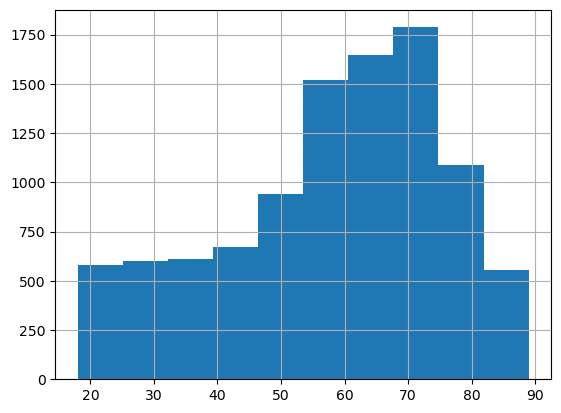

In [39]:
hist = X['age'].hist()

We can modify many parameters of the `hist` function to create a more informative figure.

<Axes: title={'center': 'Distribution of Patient Age'}, xlabel='Age', ylabel='Count'>

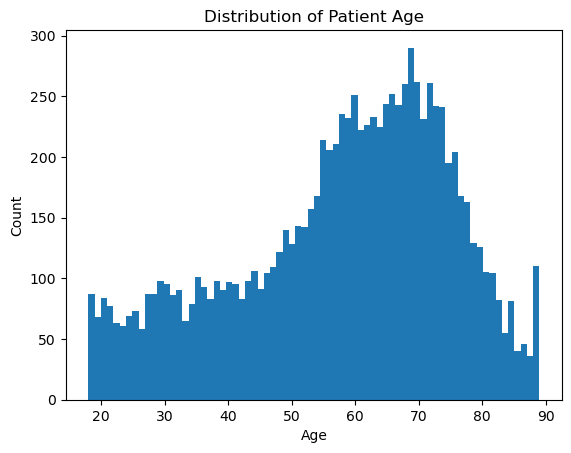

In [40]:
hist = X['age'].hist(bins=72, grid=False)
hist.set_title('Distribution of Patient Age')
hist.set_ylabel('Count')
hist.set_xlabel('Age')
display(hist)

**✏️ Excercise:** Visualize the distribution of the body mass index (`bmi`) column. Feel free to first filter out unrealistic BMI values and to experiment with the `bins` parameter of the `hist` function.

<Axes: >

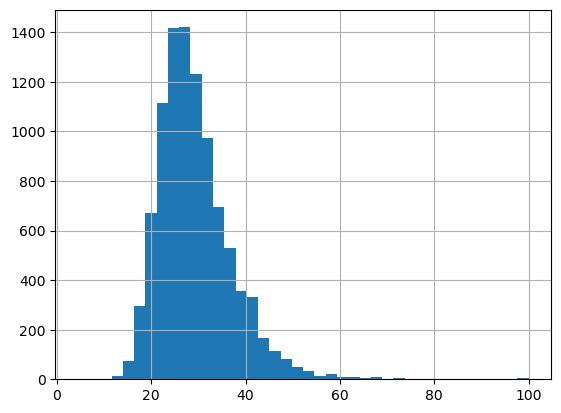

In [41]:
X['bmi'].hist(bins=40)

**🏫 Example:** We can use the `df.plot.box` function to create box plots from columns in our DataFrame:

age    Axes(0.125,0.11;0.775x0.77)
dtype: object

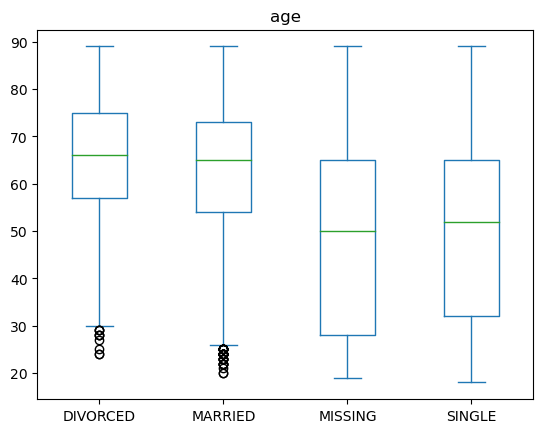

In [42]:
X.plot.box(column='age', by='marital_status')

**✏️ Excercise:** Practice with the `hist` and `box` functions by exploring different columns in our DataFrame. Experiment with data filtering methods to further refine your figures. **Hint:** We can see all of the available columns with `print(X.columns)`.

In [43]:
### Experiment with code!
